In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from scipy.constants import h, m_e, e

In [2]:
data = pd.read_csv("ElectronData.csv")

d1 = 213e-12
d2 = 123e-12
L = 13.5 / 100

data

,Voltaje (V),D1 (cm),D2 (cm)
0,2.5,3.36,5.57
1,2.7,3.20,5.49
2,2.9,3.13,5.37
3,3.1,2.94,5.12
4,3.2,2.86,4.87
5,3.4,2.70,4.70
6,3.6,2.66,4.62
7,3.8,2.70,4.40
8,4.0,2.58,4.45
9,4.3,2.45,4.25


In [3]:
V = data["Voltaje (V)"].values * 1000
D1 = data["D1 (cm)"].values / 100
D2 = data["D2 (cm)"].values / 100

# 1. Longitudes de Onda

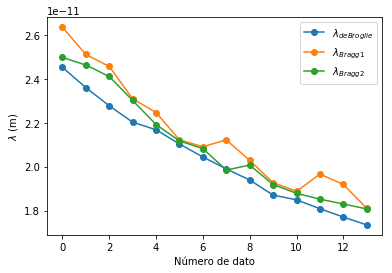

In [4]:
lambda_deBroglie = h / ((2*e*m_e*V)**0.5)
lambda_Bragg1 = 2 * d1 * np.sin(0.5 * np.arctan(0.5 * D1/L))
lambda_Bragg2 = 2 * d2 * np.sin(0.5 * np.arctan(0.5 * D2/L))

plt.plot(lambda_deBroglie, "-o", label = r"$\lambda_{de Broglie}$")
plt.plot(lambda_Bragg1, "-o", label = r"$\lambda_{Bragg 1}$")
plt.plot(lambda_Bragg2, "-o", label = r"$\lambda_{Bragg 2}$")

plt.legend()
plt.xlabel("Número de dato")
plt.ylabel("$\lambda$ (m)")
plt.savefig("lambdas.pdf")

plt.show()

In [5]:
error1 = 100 * abs(lambda_Bragg1 - lambda_deBroglie)/lambda_deBroglie
error2 = 100 * abs(lambda_Bragg2 - lambda_deBroglie)/lambda_deBroglie

print(error1.mean(), error2.mean())

5.086532266787947 2.7194249461480093


# 3. Obtener D

In [6]:
def getD(d, V, n = 1):
    l = h / ((2*e*m_e*V)**0.5)
    return 2 * L * np.tan(2 * np.arcsin(0.5 * l * n / d))

In [7]:
ds = [d1, d2, 75e-12, 58e-12, 50e-12]

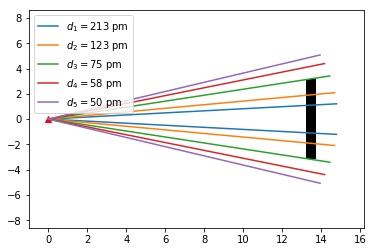

In [8]:
l = L * 100
r = np.linspace(0, 1.1 * l)
w = 5.5

plt.plot([0], [0], "r^")
plt.plot([l, l], [-0.5*w, 0.5*w], lw = 10, c = "k")

for (i, d) in enumerate(ds):
    theta = np.arctan(0.5 * getD(d, V[-1]) / L)
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    c = plt.plot(x, y, label = "$d_{%d} = %.0f$ pm"%(i + 1, d*1e12))[0].get_color()
    plt.plot(x, -y, c = c)


plt.xlim(-1, l * 1.2)

total = l * 1.2 + 1
plt.ylim(-0.5*total, 0.5*total)

plt.legend()

plt.savefig("deteccion.pdf")
plt.show()

# 4. Obtener d

In [9]:
def linear(x, m):
    return m*x

def getd1(m, dm):
    rel = dm / m
    d = 1e12 * 2 * L * h / (m * (2 * e * m_e)**0.5)
    dm = d * rel
    return d, dm

def getd2(m, dm):
    rel = dm / m
    d = 1e12 * h / (2 * m * (2 * e * m_e)**0.5)
    dm = d * rel
    return d, dm

(201.71596233051915, 1.2990195692399937)
(118.33597968303273, 0.5765476353521366)


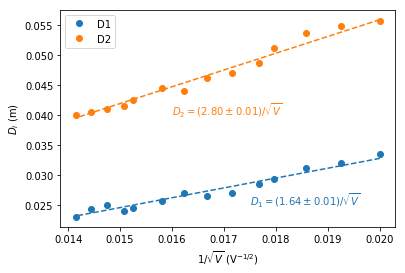

In [10]:
x = V**-0.5

popt, pcov = curve_fit(linear, x, D1)
m = popt[0]
dm = pcov[0,0]**0.5
print(getd1(m, dm))

c1 = plt.plot(x, D1, "o", label = "D1")[0].get_color()
plt.plot(x, x*m, "--", c = c1)
plt.text(0.0175, 0.025, "$D_1 = (%.2f \pm %.2f)/\sqrt{V}$"%(m, dm), color = c1)


popt, pcov = curve_fit(linear, x, D2)
m = popt[0]
dm = pcov[0,0]**0.5
print(getd1(m, dm))

c2 = plt.plot(x, D2, "o", label = "D2")[0].get_color()
plt.plot(x, x*m, "--", c = c2)
plt.text(0.016, 0.04, "$D_2 = (%.2f \pm %.2f)/\sqrt{V}$"%(m, dm), color = c2)

plt.ylabel("$D_i$ (m)")
plt.xlabel("$1/\sqrt{V}$ (V$^{-1/2}$)")

plt.legend()

plt.savefig("linear1.pdf")

plt.show()

(202.5379094810381, 1.281288009780231)
(119.72663709471847, 0.548305343667407)


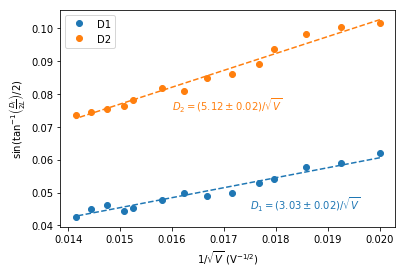

In [11]:
x = V**-0.5

y = np.sin(0.5 * np.arctan(0.5 * D1 / L))
popt, pcov = curve_fit(linear, x, y)
m = popt[0]
dm = pcov[0,0]**0.5
print(getd2(m, dm))

c1 = plt.plot(x, y, "o", label = "D1")[0].get_color()
plt.plot(x, x*m, "--", c = c1)
plt.text(0.0175, 0.045, "$D_1 = (%.2f \pm %.2f)/\sqrt{V}$"%(m, dm), color = c1)

y = np.sin(0.5 * np.arctan(0.5 * D2 / L))
popt, pcov = curve_fit(linear, x, y)
m = popt[0]
dm = pcov[0,0]**0.5
print(getd2(m, dm))

c2 = plt.plot(x, y, "o", label = "D2")[0].get_color()
plt.plot(x, x*m, "--", c = c2)
plt.text(0.016, 0.075, "$D_2 = (%.2f \pm %.2f)/\sqrt{V}$"%(m, dm), color = c2)

plt.ylabel(r"$\sin(\tan^{-1}\left(\frac{D_i}{2L}\right)/2)$")
plt.xlabel("$1/\sqrt{V}$ (V$^{-1/2}$)")

plt.legend()

plt.savefig("linear2.pdf")

plt.show()

# 5. Planck

In [12]:
def geth(V, d, D):
    return 2 * d * (2 * e * m_e * V)**0.5 * np.sin(0.5 * np.arctan(0.5 * D / L))

In [13]:
h1 = geth(V, d1, D1)
h2 = geth(V, d2, D2)

hh = np.append(h1, h2)

print(hh.mean(), hh.std())
print(100 * abs(h - hh.mean())/h)

6.883564269876818e-34 1.5893380455871125e-35
3.8860776949592646
